<a href="https://colab.research.google.com/github/MorganaMacedo/ArvoreRubroNegra/blob/master/Trabalho_AM_DMA_respiratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Banco de dados Respiratory sound, disponível para download no site:

---


https://bhichallenge.med.auth.gr/ICBHI_2017_Challenge

---

Todas as descrições deste trabalho serão apresentadas no relatório em PDF. 

No entanto, segue o código comentado:

In [ ]:
!pip install wavio

In [ ]:
!pip install keras

In [ ]:
!pip install pydub

In [ ]:
!pip install -U tensorflow-addons
!pip install -q "tqdm>=4.36.1"

     |████████████████████████████████| 1.1 MB 13.6 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import soundfile as sf
import librosa.display
from os import listdir
from os.path import isfile, join
from tensorflow.keras.utils import plot_model,to_categorical
from IPython.display import Audio
from scipy.io import wavfile
from pydub import AudioSegment
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import IPython
from IPython.display import Audio, Javascript
from scipy.io import wavfile
from base64 import b64decode
from pydub import AudioSegment


import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import os
from scipy.io import wavfile

from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from glob import glob
import argparse
import warnings
import wavio
from librosa.core import resample, to_mono


import os

import matplotlib.pyplot as plt
import gc
import time
from tqdm import tqdm, tqdm_notebook; tqdm.pandas() 
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras import backend as K
from keras.utils.layer_utils import get_source_inputs
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
from keras.models import Sequential
import tensorflow.keras as keras
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
#from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

from scipy import signal
import matplotlib.pyplot as plt
from scipy import stats
import IPython.display as ipd
import librosa
import librosa.display

from skimage.restoration import denoise_wavelet

import math




from typing import Tuple



from numpy.lib.stride_tricks import as_strided
from typing import Tuple



from sklearn.model_selection import KFold,StratifiedKFold

from tensorflow import keras 
from tensorflow.keras import layers

from tensorflow.keras.layers import LSTM, Dense,TimeDistributed, LayerNormalization,Masking
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
#!pip install kapre
#import kapre
#from kapre.composed import get_melspectrogram_layer
import tensorflow as tf
import os


import tensorflow_addons as tfa
from tqdm import tqdm
from tqdm.keras import TqdmCallback

import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


In [ ]:
#Aquisição e plot dos dados dos pacientes.
#Neste caso, se tem uma análise da doença e se o paciente se sentia saudável ou não. 
arquivo_patient_diagnosis='/content/drive/MyDrive/Trabalho_AM_DMA/patient_diagnosis.csv'
diagostico_X_treino = pd.read_csv(arquivo_patient_diagnosis, names=['ID', 'Doenca'])
diagostico_X_treino['Saudavel?'] = diagostico_X_treino['Doenca'].apply(lambda x: 'Healthy' if x =='Healthy'  else 'Unhealthy')
diagostico_X_treino.head(10)

,ID,Doenca,Saudavel?
0,101,URTI,Unhealthy
1,102,Healthy,Healthy
2,103,Asthma,Unhealthy
3,104,COPD,Unhealthy
4,105,URTI,Unhealthy
5,106,COPD,Unhealthy
6,107,COPD,Unhealthy
7,108,LRTI,Unhealthy
8,109,COPD,Unhealthy
9,110,COPD,Unhealthy


In [ ]:
#Neste arquivo tem-se as informações de idade sexo, IMC, peso altura. 
arquivo_info='/content/drive/MyDrive/Trabalho_AM_DMA/info.txt'
X_treino_info = pd.read_csv(arquivo_info, names=['ID', 'Idade', 'Sexo' , 'IMC(kg/m2)', 'Peso(kg)' , 'Altura(cm)'], delimiter = ' ')
X_treino_info.head(10)

,ID,Idade,Sexo,IMC(kg/m2),Peso(kg),Altura(cm)
0,101,3.00,F,NaN,19.0,99.0
1,102,0.75,F,NaN,9.8,73.0
2,103,70.00,F,33.00,NaN,NaN
3,104,70.00,F,28.47,NaN,NaN
4,105,7.00,F,NaN,32.0,135.0
5,106,73.00,F,21.00,NaN,NaN
6,107,75.00,F,33.70,NaN,NaN
7,108,3.00,M,NaN,NaN,NaN
8,109,84.00,F,33.53,NaN,NaN
9,110,75.00,M,25.21,NaN,NaN


In [ ]:
#Aqui juntamos as tabelas de informação da doença e a informação do paciente. 
X_treino_info_doenca =  X_treino_info.join(diagostico_X_treino.set_index('ID'), on = 'ID', how = 'left')
X_treino_info_doenca.head(10)

,ID,Idade,Sexo,IMC(kg/m2),Peso(kg),Altura(cm),Doenca,Saudavel?
0,101,3.00,F,NaN,19.0,99.0,URTI,Unhealthy
1,102,0.75,F,NaN,9.8,73.0,Healthy,Healthy
2,103,70.00,F,33.00,NaN,NaN,Asthma,Unhealthy
3,104,70.00,F,28.47,NaN,NaN,COPD,Unhealthy
4,105,7.00,F,NaN,32.0,135.0,URTI,Unhealthy
5,106,73.00,F,21.00,NaN,NaN,COPD,Unhealthy
6,107,75.00,F,33.70,NaN,NaN,COPD,Unhealthy
7,108,3.00,M,NaN,NaN,NaN,LRTI,Unhealthy
8,109,84.00,F,33.53,NaN,NaN,COPD,Unhealthy
9,110,75.00,M,25.21,NaN,NaN,COPD,Unhealthy


In [ ]:
#Esta função extrai do arquivo de texto as anotações feitas pelos profissionais da saúde 
#sobre o tipo de doença e o modo de aquisição.

Drive_audio_texto= '/content/drive/MyDrive/Trabalho_AM_DMA/events/'

texto=[s.split('.')[0] for s in os.listdir(path = Drive_audio_texto) if '.txt' in s]

def extrai_Texto(texto,Drive_audio_texto):
    tokens = texto.split('_')
    gravacao_info = pd.DataFrame(data = [tokens], columns=['ID', 'Indice', 'Localizacao torax','Modo aquisicao','Equipamento gravacao'])
    gravacao_anotacao = pd.read_csv(os.path.join(Drive_audio_texto, texto + '.txt'), names=['tempo_comeco', 'tempo_Fim', 'Estalos', 'Sibilos'], delimiter= '\t')
    return (gravacao_info, gravacao_anotacao)

In [ ]:
lista=[]
lista_anotacao=[]
lista_anota={}

for j in texto:
    (i,a) = extrai_Texto(j, Drive_audio_texto)
    lista.append(i)
    lista_anotacao.append(a)
    lista_anota[j] = a
    
gravacao_info=pd.concat(lista, axis=0)
gravacao_info.head(10) 

#Aqui temos a construção da tabela com os ids do aúdio e as informações dos arquivos de texto.
#Nas anotações a localização do tórax: 
#–Traqueia (Tc);
#–Esquerda anterior (Al);
#–Anterior direita (Ar);
#–Posterior esquerdo (Pl);
#–Posterior direita (Pr);
#–Lateral esquerda (Ll); 
#-Lateral direita (Lr).
#No modo de aquisição mc refere-se a canal simultâneo ou multicanal e sc a canal sequencial o único. 

,ID,Indice,Localizacao torax,Modo aquisicao,Equipamento gravacao
0,160,1b3,Ar,mc,AKGC417L
0,160,1b4,Ar,mc,AKGC417L
0,160,1b3,Lr,mc,AKGC417L
0,160,1b3,Al,mc,AKGC417L
0,160,1b3,Pr,mc,AKGC417L
0,160,1b4,Al,mc,AKGC417L
0,160,1b4,Pl,mc,AKGC417L
0,160,1b4,Pr,mc,AKGC417L
0,160,2b4,Pr,mc,AKGC417L
0,160,2b4,Pl,mc,AKGC417L


In [ ]:
#Aqui eu imprimo a lista para ver melhor o tipo de equipamento o tempo de começo e fim da aquisição e em que tipo se classifica a doença. 
len(lista_anota) 
print(lista_anota)

{'160_1b3_Ar_mc_AKGC417L':    tempo_comeco  tempo_Fim  Estalos  Sibilos
0         1.862      5.718        0        1
1         5.718      9.725        0        1
2         9.725     13.614        0        1
3        13.614     17.671        0        1
4        17.671     19.541        0        0, '160_1b4_Ar_mc_AKGC417L':    tempo_comeco  tempo_Fim  Estalos  Sibilos
0         1.962      6.553        0        1
1         6.553     11.160        0        1
2        11.160     15.401        1        1
3        15.401     19.841        1        1, '160_1b3_Lr_mc_AKGC417L':    tempo_comeco  tempo_Fim  Estalos  Sibilos
0         1.862      5.718        0        1
1         5.718      9.725        0        1
2         9.725     13.614        0        1
3        13.614     17.671        0        1
4        17.671     19.541        0        0, '160_1b3_Al_mc_AKGC417L':    tempo_comeco  tempo_Fim  Estalos  Sibilos
0         1.862      5.718        0        1
1         5.718      9.725        1  

In [ ]:
class Doenca_classe():
    def __init__ (self, id, doenca, arquivo):
        self.id = id
        self.doenca = doenca 
        self.arquivo = arquivo

In [ ]:
#Auxilio da bibliografia https://fereshtehshah.github.io/Respiratory_Disorders/

def get_audio_wav():
    files = [f for f in listdir(Drive_audio_texto) if isfile(join(Drive_audio_texto, f))]  
    #pega todos os arquivos do diretório
    arquivos_wav = [f for f in files if f.endswith('.wav')]  
    #pega todos os arquivos apenas com .wav
    arquivos_wav = sorted(arquivos_wav)
    return arquivos_wav, Drive_audio_texto

In [ ]:
#Obtém todos os arquivos no diretório para obter os arquivos de áudio .wav 

def doenca_data():
    patient_diagnosis = pd.read_csv('/content/drive/MyDrive/Trabalho_AM_DMA/patient_diagnosis.csv')
    arquivo_wav, pasta_audio = get_audio_wav()
    diag_dict = {101 : "URTI"}  
    doenca_lista = []
    audio_lista=[]
    c = 0

    for index , row in patient_diagnosis.iterrows():
        diag_dict[row[0]] = row[1]     
    
    for i in arquivo_wav:
        doenca_lista.append(Doenca_classe(c, diag_dict[int(i[:3])], pasta_audio+i))        
        if diag_dict[int(i[:3])] == "Healthy":
            classificacao_binaria="Healthy"
        else:
            classificacao_binaria="UnHealthy"
        audio_lista.append({'id':c,'doenca':diag_dict[int(i[:3])],'saudavel':classificacao_binaria,'NomeArquivo':i,'NomePasta':pasta_audio+i})
        c+=1  

    return doenca_lista,pd.DataFrame(audio_lista)


In [ ]:
bd_obj,bd_X_treino=doenca_data()

['URTI' 'Healthy' 'Asthma' 'COPD' 'LRTI' 'Bronchiectasis' 'Pneumonia'
 'Bronchiolitis']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


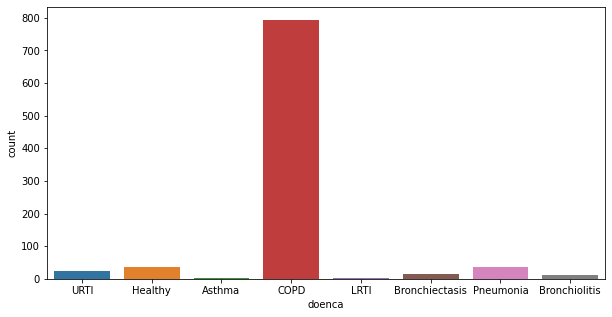

In [ ]:
#Neste gráfico podemos ver que a  doença  predominate deste dataset é a COPD que é uma doença obstrutiva crônica 
#As doenças asma e LRTI praticamente não tem insidência 
print(bd_X_treino['doenca'].unique())
plt.figure(figsize=(10,5))
sns.countplot(bd_X_treino['doenca'])

In [ ]:
bd_X_treino.to_csv("doenca.csv",index=False)


In [ ]:
#Aqui retiro as doenças asma e LRTI devido as poucas amostras para treino
bd_X_treino_processado = bd_X_treino[ (bd_X_treino['doenca'] !='Asthma') &  (bd_X_treino['doenca'] !='LRTI') ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


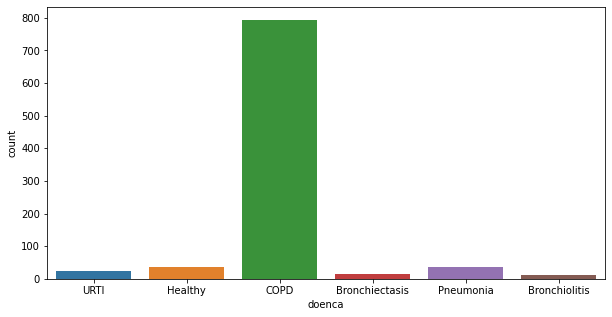

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(bd_X_treino_processado['doenca'])

In [ ]:
bd_X_treino_processado.head(10)

,id,doenca,saudavel,NomeArquivo,NomePasta
0,0,URTI,UnHealthy,101_1b1_Al_sc_Meditron.wav,/content/drive/MyDrive/Trabalho_AM_DMA/audio_a...
1,1,URTI,UnHealthy,101_1b1_Pr_sc_Meditron.wav,/content/drive/MyDrive/Trabalho_AM_DMA/audio_a...
2,2,Healthy,Healthy,102_1b1_Ar_sc_Meditron.wav,/content/drive/MyDrive/Trabalho_AM_DMA/audio_a...
4,4,COPD,UnHealthy,104_1b1_Al_sc_Litt3200.wav,/content/drive/MyDrive/Trabalho_AM_DMA/audio_a...
5,5,COPD,UnHealthy,104_1b1_Ar_sc_Litt3200.wav,/content/drive/MyDrive/Trabalho_AM_DMA/audio_a...
6,6,COPD,UnHealthy,104_1b1_Ll_sc_Litt3200.wav,/content/drive/MyDrive/Trabalho_AM_DMA/audio_a...
7,7,COPD,UnHealthy,104_1b1_Lr_sc_Litt3200.wav,/content/drive/MyDrive/Trabalho_AM_DMA/audio_a...
8,8,COPD,UnHealthy,104_1b1_Pl_sc_Litt3200.wav,/content/drive/MyDrive/Trabalho_AM_DMA/audio_a...
9,9,COPD,UnHealthy,104_1b1_Pr_sc_Litt3200.wav,/content/drive/MyDrive/Trabalho_AM_DMA/audio_a...
10,10,URTI,UnHealthy,105_1b1_Tc_sc_Meditron.wav,/content/drive/MyDrive/Trabalho_AM_DMA/audio_a...


In [ ]:
arquivo_audio, taxa_amostragem = librosa.core.load(bd_X_treino_processado.NomePasta[0])

In [ ]:
#Auxilio da bibliografia https://fereshtehshah.github.io/Respiratory_Disorders/
#Reajuste dos parâmetros para se encorporar a proposta

#Preprocessamento dos parâmetros
# Taxa de amostragem
taxaAmostragem = 44100 
duracao = 10
comprimento = 347 
fmin = 20

fmax = taxaAmostragem // 2
n_mels = 128

n_fft = n_mels * 20
amostras = taxaAmostragem * duracao

In [ ]:
#https://librosa.org/doc/latest/index.html

def le_audio(arquivo):
    y, taxaAmostragem = librosa.core.load(arquivo, sr=16000,duration=duracao)
    return y

def converte_audio_espectro(audio,s_r,n_mel_val):
    espec = librosa.feature.melspectrogram(audio, sr=s_r,n_mels=n_mel_val,hop_length=comprimento,n_fft=n_mel_val*20,fmin=20,fmax=s_r//2) 
    return librosa.power_to_db(espec).astype(np.float32)

#https://librosa.org/doc/latest/generated/librosa.feature.melspectrogram.html?highlight=melspectrogram#librosa.feature.melspectrogram

def le_espectro(arquivo):
    mels = converte_audio_espectro(le_audio(arquivo))
    return mels

def converte_audio_espectro2(audio,s_r,n_mel_val):
    espec = librosa.feature.melspectrogram(audio,sr=s_r,n_mels=n_mel_val,hop_length=comprimento,n_fft=n_mel_val*20,fmin=20,fmax=s_r//2) 
    return librosa.power_to_db(espec).astype(np.float32)

def le_espectro2(arquivo):
    mels = converte_audio_espectro2(le_audio(arquivo))
    return mels

#https://www.kaggle.com/servietsky/fast-import-audio-and-save-spectrograms

def converte_wav_imagem(X_treino):
    X_mel_espec = []
    X_mel_espec2 = []
    for _,row in tqdm(X_treino.iterrows()):
        x_espec = le_espectro(row.NomePasta)
        x_espec2 = le_espectro2(row.NomePasta)
        X_mel_espec.append(x_espec.transpose(),)
        X_mel_espec2.append(x_espec2.transpose())
    return X_mel_espec,X_mel_espec2


def normaliza(img):
    eps = 0.001
    if np.std(img) != 0:
        img = (img - np.mean(img)) / np.std(img)
    else:
        img = (img - np.mean(img)) / eps
    return img

def normalize_dataset(X):
    normalizabd = []
    for img in X:
        normaliza = normaliza(img)
        normalizabd.append(normaliza)
    return normalizabd


In [ ]:
#https://librosa.org/doc/latest/index.html
def get_audio(NomePasta: str) -> Tuple[np.ndarray, int]:
    audio_data, taxaAmostragem = librosa.core.load(NomePasta)
    comprimento = len(audio_data)/taxaAmostragem
    return audio_data, taxaAmostragem, comprimento


#Auxilio da bibliografia https://fereshtehshah.github.io/Respiratory_Disorders
#cálculo adaptado do meu paper da linguagem matlab
class DeslocaJaneladeAudionoTempo():
    def __init__(self) -> None:
        pass
    def get_janela_audio(self, audio: np.ndarray, taxaAmostragem: int, comprimento: int, tamanho_janela: int, passo: int) -> np.ndarray:
        frame = int((comprimento - tamanho_janela) / passo) + 1
        tamanho_janela = tamanho_janela * taxaAmostragem
        passo = passo * taxaAmostragem
        audio_frames = []
        for index in range(frame):
            if (passo * index + tamanho_janela) < len(audio):
                frame = audio[passo * index:(passo * index + tamanho_janela)]
                audio_frames.append(frame)
            else:
                break
        return np.array(audio_frames)

In [ ]:
# Wavelet contínua: filtro de retirada de ruído 
# Wavelet CWT Coiflet escala 2 nível de decomposição 5 

class Wavelet:

    def retira_ruido_coif2(self, filtra, taxa_amostragem):
        x_den = denoise_wavelet(filtra, method='VisuShrink', mode='soft', wavelet_levels=5, wavelet='coif2',rescale_sigma='True')
        return x_den, taxa_amostragem

# filtros High Pass 

class Filtro_HP:
    def __init__(self, high_pass):
        self.high_pass = high_pass
    def passaAlta(self, sinal, taxa_amostragem):
        b, a = signal.butter(4, 100 / (22050 / 2), btype='highpass')
        filtra = signal.lfilter(b, a, sinal)
        return filtra, taxa_amostragem

# filtros Low Pass 
class Filtro_LP:
    def __init__(self, low_pass):
        self.low_pass = low_pass
    def passaBaixa(self, filtra_sinal, taxa_amostragem):
        c, d = signal.butter(4, 2000 / (22050 / 2), btype='lowpass')
        filtra = signal.lfilter(c, d, filtra_sinal)
        return filtra, taxa_amostragem


class Filtros():

    def __init__(self, passabaixas, passaaltas):
        self.passabaixas = passabaixas
        self.passaaltas = passaaltas
        self.wavelet = Wavelet()
        self.lp_filtro = Filtro_LP(passabaixas)
        self.hp_filtro = Filtro_HP(passaaltas)

    def compoe_wavelet(self, sinal_audio, taxaAmostragem):
        saida_filtrada, taxaAmostragem = self.lp_filtro.passaBaixa(sinal_audio, taxaAmostragem)
        saida_filtrada, taxaAmostragem = self.hp_filtro.passaAlta(saida_filtrada, taxaAmostragem)
        saida_filtrada, taxaAmostragem = self.wavelet.retira_ruido_coif2(saida_filtrada, taxaAmostragem)
        return saida_filtrada, taxaAmostragem

In [ ]:
#https://www.kaggle.com/servietsky/fast-import-audio-and-save-spectrograms

freq_passaBaixa = 100
freq_passaalta = 2000
freq_comprimento = 347
comprimento_janela = 5
comprimento_audio = 5


class ProcessaAudio(DeslocaJaneladeAudionoTempo, Filtros):

    def __init__(self):
        DeslocaJaneladeAudionoTempo.__init__(self)
        Filtros.__init__(self, freq_passaBaixa, freq_passaalta)
        super().__init__()

    def pre_processa_audio(self, arquivo_audio: str, taxaAmostragem: int) -> np.ndarray:
        audio, taxaAmostragem, length = get_audio(arquivo_audio, taxaAmostragem)
        filtra_audio, taxaAmostragem = self.compoe_wavelet(audio, taxaAmostragem)
        audio_frames = self.get_audio_windows(filtra_audio, taxaAmostragem, length, comprimento_janela,comprimento_audio)

        return audio_frames
#convert para mfcc após a leitura dos áudios 
    def audio_espectro(self, audio_data: np.ndarray, s_r: int, n_mel_val: int) -> np.ndarray:
        espectro = librosa.feature.melspectrogram(audio_data,taxaAmostragem=s_r,n_mels=n_mel_val,hop_length=freq_comprimento,
                                                 n_fft=n_mel_val * 20,fmin=20,fmax=s_r // 2)

        return librosa.power_to_db(espectro).astype(np.float32)

In [ ]:
#Configurações dos parâmetros dos filtros 
comprimento_janela = 5
comprimento_audio = 4


X_espectro = []
X_espectro2 = []
Y = []
#pega os parâmetros de amostragem, o áudio em .wav e convert para espectro 
#Ou seja, pega uma janela de áudio e normaliza 
for  indx, df_row in tqdm(bd_X_treino_processado.iterrows() ):
     head, arquivo_audio = os.path.split(df_row.NomePasta)
     nome_arquivo_audio = arquivo_audio.split('.wav')[0]   
     doenca_tipo =df_row.doenca
     ciclos_audio = lista_anota.get(nome_arquivo_audio)
     audio_data, taxaAmostragem,comp = get_audio(df_row.NomePasta)
     frame = int((comp - comprimento_janela) / comprimento_audio) + 1
     tam_janela = comprimento_janela * taxaAmostragem
     passo = comprimento_audio*taxaAmostragem
     audio_frames = []


     for i in range(frame):
            if (passo * i + tam_janela) < len(audio_data):
               frame = audio_data[passo * i:(passo * i + tam_janela)]
               x_espec = converte_audio_espectro(frame,s_r=taxaAmostragem,n_mel_val=128)
               x_espec2 = converte_audio_espectro2(frame,s_r=taxaAmostragem,n_mel_val=64)
               X_espectro.append(x_espec.transpose(),)
               X_espectro2.append(x_espec2.transpose())
               Y.append(str(doenca_tipo))
            else:
                break

917it [34:13,  2.24s/it]


In [ ]:
X_atual_espec = np.array(X_espectro)
X_atual_espec2 = np.array(X_espectro2)
X_array_espec=np.array(X_atual_espec)
X_array_espec2=np.array(X_atual_espec2)

In [ ]:
comp_max_audio = max([len(i) for i in X_array_espec])
comp_max_audio2 = max([len(i) for i in X_array_espec2])

X_array_espec=pad_sequences(X_array_espec, padding="post", dtype='float32')
X_array_espec2=pad_sequences(X_array_espec2, padding="post", dtype='float32')
X_array_espec[0].shape

(318, 128)

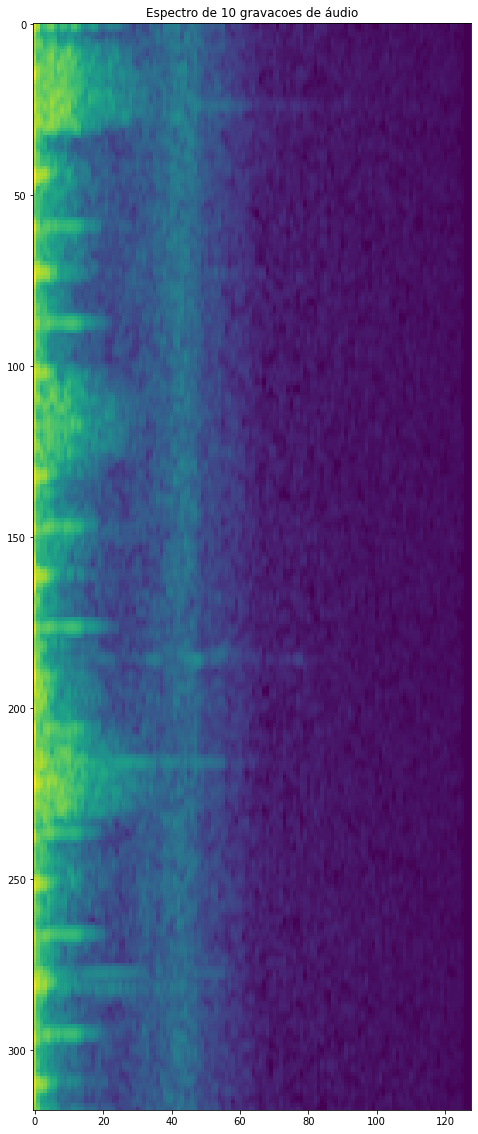

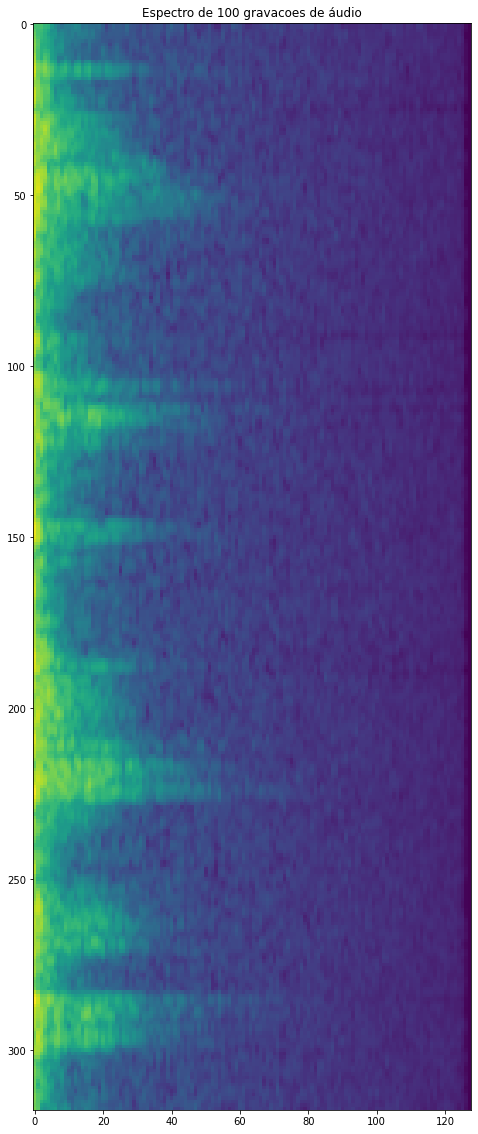

In [ ]:
#aqui imprimimos o espctro para 10 e 100 gravações 
plt.figure(figsize=(30,20))
plt.title('Espectro de 10 gravacoes de áudio')
plt.imshow(X_array_espec[10]);

plt.figure(figsize=(30,20))
plt.title('Espectro de 100 gravacoes de áudio')
plt.imshow(X_array_espec[100]);

In [ ]:
X_array_espec.shape[0]

4035

In [ ]:
comp_espect=X_array_espec.shape[0]
X_treino_espect = np.empty((comp_espect,2), dtype=np.object)
for i in range(comp_espect):
    X_treino_espect[i,]=([X_array_espec[i],X_array_espec2[i]])

In [ ]:
import os
os.makedirs('/content/drive/MyDrive/Trabalho_AM_DMA/salvaTipoClasseDoenca/')

In [ ]:
#LabelEncoder é uma classe de utilitário para ajudar a normalizar rótulos de forma que contenham apenas valores entre 0 e n_classes-1.
le = LabelEncoder()
doenca_classes= list(set(Y))
le.fit(doenca_classes)
y = le.transform(Y)
Y=to_categorical(y, num_classes=len(doenca_classes))
np.save('/content/drive/MyDrive/Trabalho_AM_DMA/salvaTipoClasseDoenca/doenca_classes.npy', le.classes_)

In [ ]:
tempo_audio=X_treino_espect[0][0].shape[0]
features_espectro =X_treino_espect[0][0].shape[1]
NO_CLASSES=6 

In [ ]:
#https://github.com/rkadlec/ubuntu-ranking-dataset-creator/blob/master/README.md
#https://www.datacamp.com/community/tutorials/lstm-python-stock-market?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=20104&gclid=CjwKCAiA7dKMBhBCEiwAO_crFIPsOf6qgPW68YNSoc3kv6peU8LvnTRrGxA1-8MM3IK8glh2H_T3nBoC_UoQAvD_BwE
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
#https://github.com/architgajpal/respiratory_disease_classification/blob/master/Respiratory_disease_classification.ipynb
#https://www.kaggle.com/mehmetlaudatekman/lstm-text-classification-pytorch
#Como visto em aula o LSTM é uma variante do RNN capaz de capturar dependências de longo prazo. A seguir estão os parâmetros desta camada:
#input_size: dimensão da entrada
#hidden_size: Número de nós ocultos
#num_layers: número de camadas a serem empilhadas
#batch_first: se True, os tensores de entrada e saída são fornecidos como  (batch, seq, feature)
#dropout: Se diferente de zero, introduz uma camada Dropout nas saídas de cada camada LSTM, exceto a última camada, com probabilidade de dropout igual ao dropout. default: 0
#bidirection: se True, introduz um LSTM bidirecional

def Long_Short_Term(N_CLASSES,comp_max_audio,no_features):
    
    i1=Input(shape=(comp_max_audio,no_features), dtype="float32",name='espectro_entrada')
    x1 = LayerNormalization(axis=2, name='batch_norm')(i1)
    x1 = TimeDistributed(layers.Reshape((-1,)), name='reshape')(x1)
    s1 = TimeDistributed(layers.Dense(64, activation='tanh'),name='td_dense_tanh')(x1)
    x1 = layers.Bidirectional(layers.LSTM(128, return_sequences=True),name='LSTM_1-128')(s1)
    x1 = layers.Bidirectional(layers.LSTM(256, return_sequences=True),name='LSTM_1-256')(x1)
    x1 = layers.Bidirectional(layers.LSTM(64, return_sequences=True),name='LSTM_1-64')(x1)
    x1 = layers.concatenate([s1, x1], axis=2, name='skip_connection')
    x1 = layers.Dense(64, activation='relu', name='dense_1_relu')(x1)
    x1 = layers.MaxPooling1D(name='max_pool_1d')(x1)
    x1 = layers.Dense(32, activation='relu', name='dense_2_relu')(x1)
    x1 = layers.Flatten(name='flatten')(x1)
    x1 = layers.Dropout(rate=0.2, name='dropout')(x1)
    x1 = layers.Dense(32, activation='relu',activity_regularizer=l2(0.001),name='dense_3_relu')(x1)
    
    
    i2=Input(shape=(comp_max_audio,64), dtype="float32",name='espectro_entrada2')
    x2 = LayerNormalization(axis=2, name='batch_norm_mel-spectral2')(i2)
    x2 = TimeDistributed(layers.Reshape((-1,)), name='reshape_mel-spectral2')(x2)
    s2 = TimeDistributed(layers.Dense(64, activation='tanh'),name='td_dense_tanh_mel-spectral2')(x2)
    x2 = layers.Bidirectional(layers.LSTM(128, return_sequences=True),name='mel-2-LSTM_1-128')(s2)
    x2 = layers.Bidirectional(layers.LSTM(256, return_sequences=True),name='mel-2-LSTM_1-256')(x2)
    x2 = layers.Bidirectional(layers.LSTM(64, return_sequences=True),name='mel-2-LSTM_1-64')(x2)
    x2 = layers.concatenate([s2, x2], axis=2, name='skip_connection_mel-spectral2')
    x2 = layers.Dense(64, activation='relu', name='dense_1_relu_mel-spectral2')(x2)
    x2 = layers.MaxPooling1D(name='max_pool_1d_mfcc')(x2)
    x2 = layers.Dense(32, activation='relu', name='dense_2_relu_mel-spectral2')(x2)
    x2 = layers.Flatten(name='flatten_mel-spectral2')(x2)
    x2 = layers.Dropout(rate=0.2, name='dropout_mel-spectral2')(x2)
    x2 = layers.Dense(32, activation='relu',activity_regularizer=l2(0.001),name='dense_3_relu_mel-spectral2')(x2)
    
    x = layers.concatenate([x1, x2], name='mel-mfcc_connection')
    o = layers.Dense(N_CLASSES, activation='softmax', name='softmax')(x)
    modelo = Model(inputs=[i1,i2], outputs=o, name='dual_convolutional_long_short_term_memory')
    modelo.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return modelo

modelo = Long_Short_Term(NO_CLASSES,tempo_audio,features_espectro)
modelo.summary()

Model: "dual_convolutional_long_short_term_memory"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 espectro_entrada (InputLayer)  [(None, 318, 128)]   0           []                               
                                                                                                  
 espectro_entrada2 (InputLayer)  [(None, 318, 64)]   0           []                               
                                                                                                  
 batch_norm (LayerNormalization  (None, 318, 128)    256         ['espectro_entrada[0][0]']       
 )                                                                                                
                                                                                                  
 batch_norm_mel-spectral2 (Laye  (None, 318, 64)     128  

In [ ]:
#https://github.com/tqdm/tqdm
barra = tfa.callbacks.TQDMProgressBar()

In [ ]:
#Como visto em aula não sabemos o melhor número de Folds, então como sugerido apliquei 3
numeroFolds = 3
acuracia_Fold = []
perda_Fold = []

#Definir a validação cruzada por fold
stratifiedKFold = StratifiedKFold(n_splits=numeroFolds, shuffle=True)
#Avaliação do modelo de validação cruzada K-fold
fold_no = 1
hist_fold=[]

#https://keras.io/api/callbacks/model_checkpoint/
arquivo_checar = 'training_lstm_v2/cp.ckpt'
arquivo_checar = os.path.dirname(arquivo_checar)
modelCheckpoint = keras.callbacks.ModelCheckpoint(filepath=arquivo_checar,monitor='val_accuracy',
                                                            verbose=0, mode='max', save_best_only=True)

progressbar=keras.callbacks.ProgbarLogger(count_mode="samples", stateful_metrics=['acc','val_loss'])

keras_callbacks = [modelCheckpoint, barra]


modelo = Long_Short_Term(NO_CLASSES,tempo_audio,features_espectro)
class_labels = np.argmax(Y, axis=1)

#Percorre os índices que o método split() retorna
for index, (X_treino_indice, val_indices) in enumerate(stratifiedKFold.split(X_treino_espect, class_labels)):
    ## Gerar batches de índices
    X_treino, xval = X_treino_espect[X_treino_indice], X_treino_espect[val_indices]
    Y_treino, yval = Y[X_treino_indice], Y[val_indices]
    x_espec= np.empty( ( int(X_treino.shape[0]) ,int(X_treino[0][0].shape[0]) , int(X_treino[0][0].shape[1]) ), dtype=np.float32)
    x_espec2= np.empty( ( int(X_treino.shape[0]) ,int(X_treino[0][1].shape[0]) , int(X_treino[0][1].shape[1]) ), dtype=np.float32)
    x_espec_val= np.empty( ( int(xval.shape[0]) ,int(xval[0][0].shape[0]) , int(xval[0][0].shape[1]) ), dtype=np.float32)
    x_espec2_val= np.empty( ( int(xval.shape[0]) ,int(xval[0][1].shape[0]) , int(xval[0][1].shape[1]) ), dtype=np.float32)
   
    #Extrai 2 features para a matriz Numpy - Conjunto de treinamento
    for i,x in enumerate(X_treino):
        x_espec[i,]=x[0]
        x_espec2[i,]=x[1]

    #Extrai 2 features para o conjunto de validação
    for i,x in enumerate(xval):
        x_espec_val[i,]=x[0]
        x_espec2_val[i,]=x[1]
    
    #cria batch
    history = modelo.fit({'espectro_entrada':x_espec,'espectro_entrada2':x_espec2}, Y_treino,batch_size=32,epochs=10,verbose=0,callbacks=keras_callbacks,validation_split=0.2)
    hist_fold.append(history)
    
    #generalização das métricas
    variacao = modelo.evaluate({'espectro_entrada':x_espec_val,'espectro_entrada2':x_espec2_val}, yval, verbose=0)
    print(f'variacao por fold {fold_no}: {modelo.metrics_names[0]} de {variacao[0]}; {modelo.metrics_names[1]} de {variacao[1]*100}%' )
    acuracia_Fold.append(variacao[1] * 100)
    perda_Fold.append(variacao[0]) 

Training:   0%|           0/10 ETA: ?s,  ?epochs/s

Epoch 1/10


0/68           ETA: ?s - 

INFO:tensorflow:Assets written to: training_lstm_v2/assets


INFO:tensorflow:Assets written to: training_lstm_v2/assets


Epoch 2/10


0/68           ETA: ?s - 

Epoch 3/10


0/68           ETA: ?s - 

Epoch 4/10


0/68           ETA: ?s - 

Epoch 5/10


0/68           ETA: ?s - 

Epoch 6/10


0/68           ETA: ?s - 

INFO:tensorflow:Assets written to: training_lstm_v2/assets


INFO:tensorflow:Assets written to: training_lstm_v2/assets


Epoch 7/10


0/68           ETA: ?s - 

INFO:tensorflow:Assets written to: training_lstm_v2/assets


INFO:tensorflow:Assets written to: training_lstm_v2/assets


Epoch 8/10


0/68           ETA: ?s - 

INFO:tensorflow:Assets written to: training_lstm_v2/assets


INFO:tensorflow:Assets written to: training_lstm_v2/assets


Epoch 9/10


0/68           ETA: ?s - 

Epoch 10/10


0/68           ETA: ?s - 

variacao por fold 1: loss de 0.3396928608417511; accuracy de 89.88847732543945%


Training:   0%|           0/10 ETA: ?s,  ?epochs/s

Epoch 1/10


0/68           ETA: ?s - 

Epoch 2/10


0/68           ETA: ?s - 

Epoch 3/10


0/68           ETA: ?s - 

Epoch 4/10


0/68           ETA: ?s - 

Epoch 5/10


0/68           ETA: ?s - 

Epoch 6/10


0/68           ETA: ?s - 

Epoch 7/10


0/68           ETA: ?s - 

Epoch 8/10


0/68           ETA: ?s - 

Epoch 9/10


0/68           ETA: ?s - 

Epoch 10/10


0/68           ETA: ?s - 

variacao por fold 1: loss de 0.24910618364810944; accuracy de 93.68029832839966%


Training:   0%|           0/10 ETA: ?s,  ?epochs/s

Epoch 1/10


0/68           ETA: ?s - 

Epoch 2/10


0/68           ETA: ?s - 

Epoch 3/10


0/68           ETA: ?s - 

Epoch 4/10


0/68           ETA: ?s - 

Epoch 5/10


0/68           ETA: ?s - 

Epoch 6/10


0/68           ETA: ?s - 

INFO:tensorflow:Assets written to: training_lstm_v2/assets


INFO:tensorflow:Assets written to: training_lstm_v2/assets


Epoch 7/10


0/68           ETA: ?s - 

Epoch 8/10


0/68           ETA: ?s - 

INFO:tensorflow:Assets written to: training_lstm_v2/assets


INFO:tensorflow:Assets written to: training_lstm_v2/assets


Epoch 9/10


0/68           ETA: ?s - 

Epoch 10/10


0/68           ETA: ?s - 

variacao por fold 1: loss de 0.18084551393985748; accuracy de 96.65427803993225%


In [ ]:
print('Acurácia por Fold')
for i in range(0, len(acuracia_Fold)):
  print(f'> Fold {i+1} - Perda: {perda_Fold[i]} - Acuracia: {acuracia_Fold[i]}%')

print('Media para todos os folds:')
print(f'> Acuracia: {np.mean(acuracia_Fold)} (+- {np.std(acuracia_Fold)})')
print(f'> Perda: {np.mean(perda_Fold)}')

Acurácia por Fold
> Fold 1 - Perda: 0.3497447371482849 - Acuracia: 90.63196778297424%
> Fold 2 - Perda: 0.18320445716381073 - Acuracia: 95.83643078804016%
> Fold 3 - Perda: 0.18160977959632874 - Acuracia: 96.80297374725342%
Media para todos os folds:
> Acuracia: 94.42379077275594 (+- 2.7101036280775856)
> Perda: 0.23818632463614145


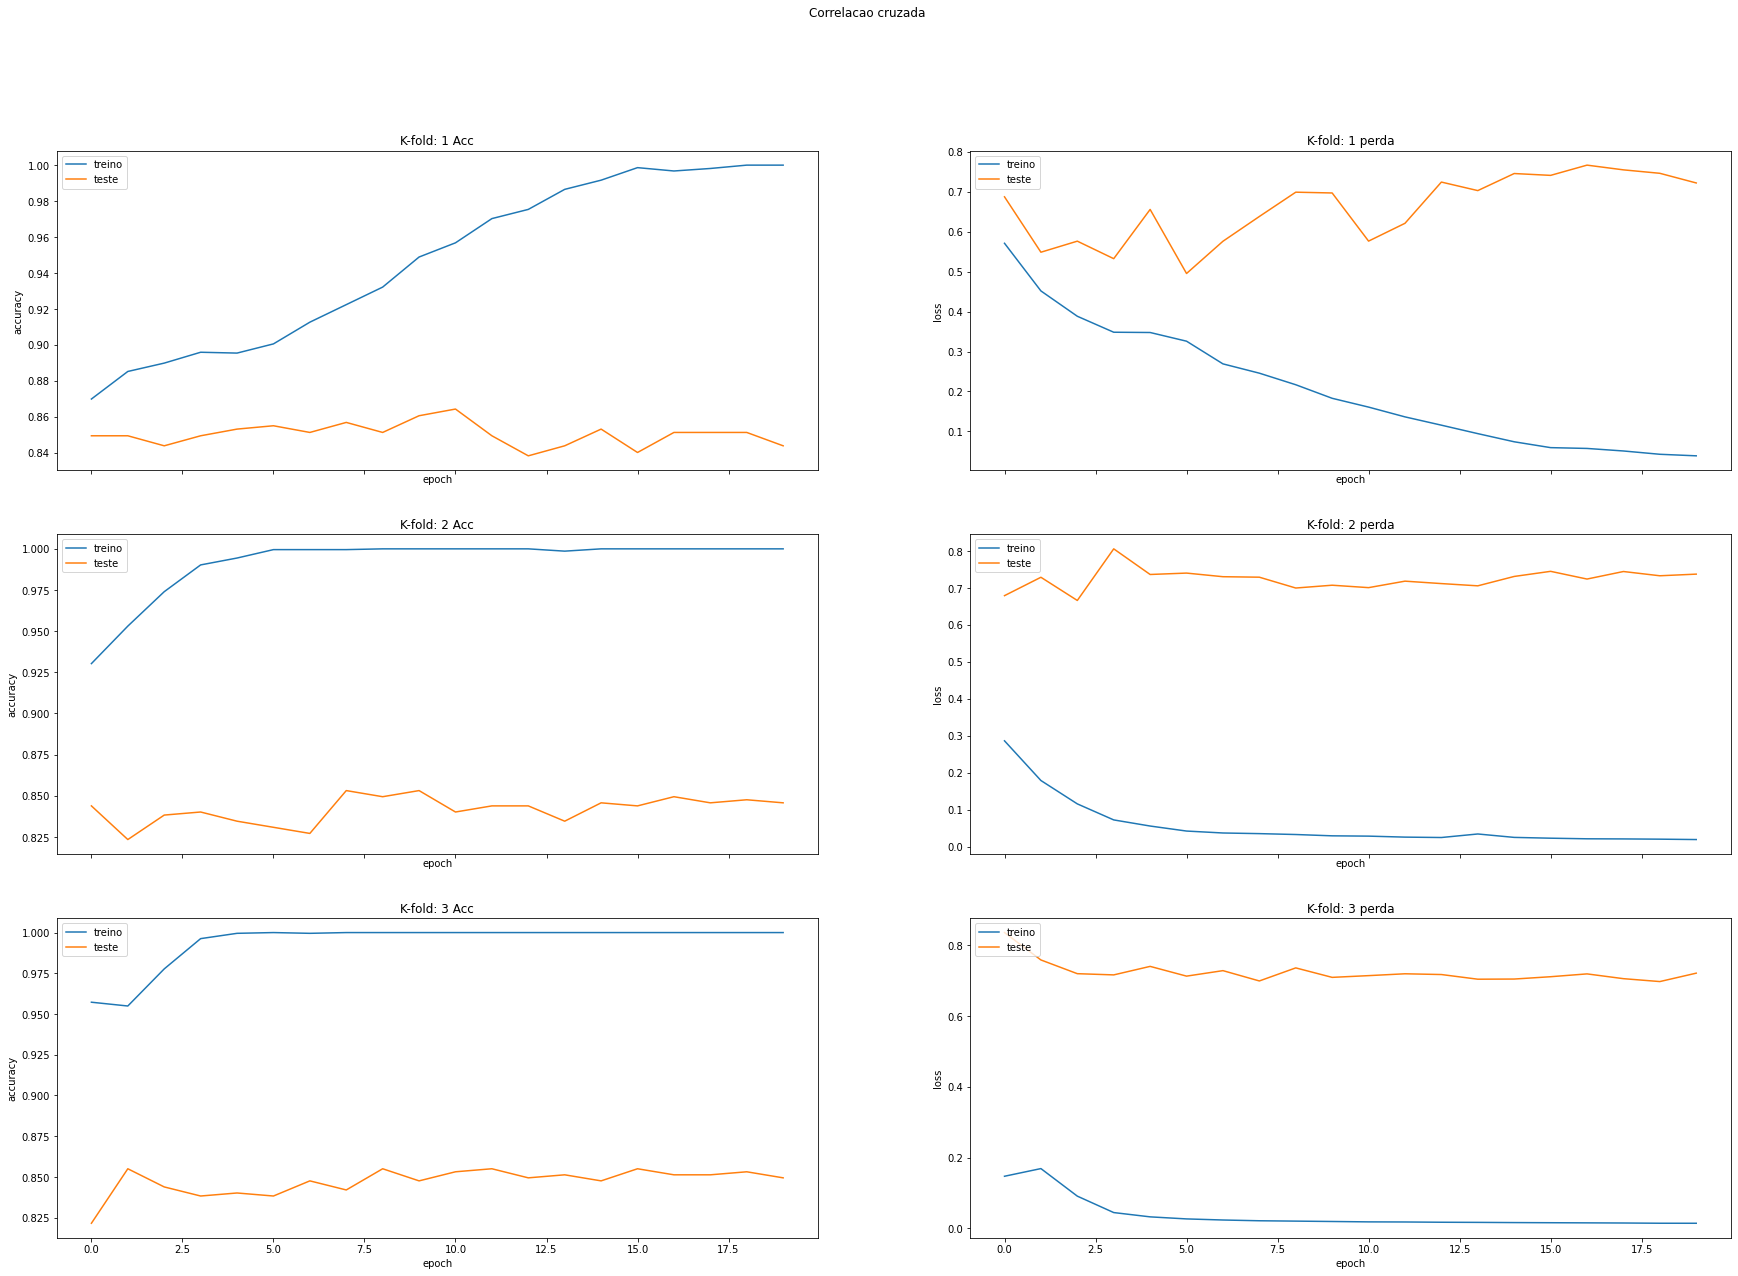

In [ ]:
fig, axes = plt.subplots(numeroFolds, 2,sharex=True,figsize=(30,20))
fig.suptitle('Correlacao cruzada')

index_sub_plot=1

for history in hist_fold:
    
    axes[index_sub_plot-1,0].set_title('K-fold: {} Acc'.format(index_sub_plot))
    axes[index_sub_plot-1,0].plot(history.history['accuracy'])
    axes[index_sub_plot-1,0].plot(history.history['val_accuracy'])
    axes[index_sub_plot-1,0].set_ylabel('accuracy')
    axes[index_sub_plot-1,0].set_xlabel('epoch')
    axes[index_sub_plot-1,0].legend(['treino', 'teste'], loc='upper left')
    
    axes[index_sub_plot-1,1].set_title('K-fold: {} perda'.format(index_sub_plot))
    axes[index_sub_plot-1,1].plot(history.history['loss'])
    axes[index_sub_plot-1,1].plot(history.history['val_loss'])
    axes[index_sub_plot-1,1].set_ylabel('loss')
    axes[index_sub_plot-1,1].set_xlabel('epoch')
    axes[index_sub_plot-1,1].legend(['treino', 'teste'], loc='upper left')
    
    index_sub_plot+=1

In [ ]:
!ls {arquivo_checar}

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
pasta_checar = 'training_lstm_v2/saved_model.pb' 
pasta_dir = os.path.dirname(pasta_checar)
modelo_otimiza = tf.keras.models.load_model(pasta_dir)

In [ ]:
modelo_otimiza.save("my_model")
modelo_otimiza.save("my_h5_model.h5")

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


                precision    recall  f1-score   support

Bronchiectasis       0.69      0.43      0.53        21
 Bronchiolitis       1.00      0.67      0.80        18
          COPD       0.98      0.99      0.99      1180
       Healthy       0.85      0.85      0.85        47
     Pneumonia       0.93      0.80      0.86        49
          URTI       0.75      0.90      0.82        30

      accuracy                           0.97      1345
     macro avg       0.87      0.77      0.81      1345
  weighted avg       0.97      0.97      0.97      1345



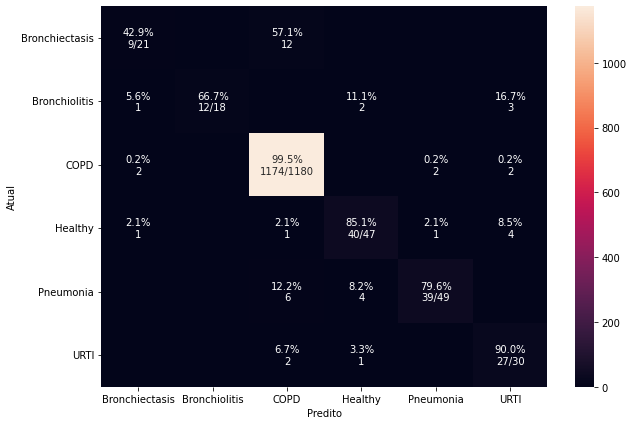

In [ ]:
matriz = le.classes_

preds = modelo_otimiza.predict({'espectro_entrada':x_espec_val,'espectro_entrada2':x_espec2_val})
classe_pred = np.argmax(preds, axis=1) 
y_teste_classe = np.argmax(yval, axis=1)

matriz_conf = confusion_matrix(y_teste_classe, classe_pred)
print(classification_report(y_teste_classe, classe_pred, target_names=matriz))

conta_elem_matriz = np.sum(matriz_conf, axis=1, keepdims=True)
conta_percentual = matriz_conf / conta_elem_matriz.astype(float) * 100
annot = np.empty_like(matriz_conf).astype(str)
nrows, ncols = matriz_conf.shape
for i in range(nrows):
    for j in range(ncols):
        c = matriz_conf[i, j]
        p = conta_percentual[i, j]
        if i == j:
            s = conta_elem_matriz[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


t_matriz_conf = pd.DataFrame(matriz_conf, index = matriz, columns = matriz)
t_matriz_conf.index.name = 'Atual'
t_matriz_conf.columns.name = 'Predito'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(t_matriz_conf, annot=annot, fmt='')